#                                  HEPATITIS Disease Analysis

#  Importing the necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

#  Import the dataset which is to be analysed

In [3]:
df = pd.read_csv("hepatitis_csv.csv")
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


#  Checking for null values in the dataset

In [4]:
df.isna().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In this dataset, protime column contains more than 40 % of missing values,so therefore dropping that column from this dataset and also dropping other missing values from this dataset.

In [5]:
df = df.drop('protime',axis=1)

In [6]:
df = df.dropna()

In [7]:
df.isna().sum().sum()

0

Now it is confirmed that there is no missing values in this dataset

# Number of rows and columns in the dataset

In [8]:
print('No of rows in the dataset :',df.shape[0] )

No of rows in the dataset : 112


In [9]:
print('No of Columns in the dataset :',df.shape[1] )

No of Columns in the dataset : 19


In [10]:
df.shape

(112, 19)

#  Dataset Information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              112 non-null    int64  
 1   sex              112 non-null    object 
 2   steroid          112 non-null    object 
 3   antivirals       112 non-null    bool   
 4   fatigue          112 non-null    object 
 5   malaise          112 non-null    object 
 6   anorexia         112 non-null    object 
 7   liver_big        112 non-null    object 
 8   liver_firm       112 non-null    object 
 9   spleen_palpable  112 non-null    object 
 10  spiders          112 non-null    object 
 11  ascites          112 non-null    object 
 12  varices          112 non-null    object 
 13  bilirubin        112 non-null    float64
 14  alk_phosphate    112 non-null    float64
 15  sgot             112 non-null    float64
 16  albumin          112 non-null    float64
 17  histology       

# This gives the overall information about each and every variables in this dataset

# Descriptive Statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,112.0,41.196429,12.150586,7.0,32.0,39.0,50.0,78.0
bilirubin,112.0,1.272321,0.886252,0.3,0.7,1.0,1.4,4.8
alk_phosphate,112.0,105.491071,53.295707,26.0,72.0,85.0,133.5,295.0
sgot,112.0,78.616071,68.761010,14.0,30.0,56.5,98.0,420.0
albumin,112.0,3.834821,0.576368,2.1,3.5,4.0,4.2,5.3


This gives the information about descriptive statistics for every continous variables in this dataset.

# Columns in dataset

In [13]:
df.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'histology',
       'class'],
      dtype='object')

# Correlation between Variables

In [14]:
df_corr = df.corr()
df_corr

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,histology
age,1.000000,0.025413,0.139721,-0.043096,-0.046631,-0.163845,0.188111
antivirals,0.025413,1.000000,-0.200999,-0.193487,-0.102940,0.201078,-0.192726
bilirubin,0.139721,-0.200999,1.000000,0.254596,0.321084,-0.327904,0.293257
alk_phosphate,-0.043096,-0.193487,0.254596,1.000000,0.299549,-0.382884,0.288455
sgot,-0.046631,-0.102940,0.321084,0.299549,1.000000,-0.089360,0.103354
albumin,-0.163845,0.201078,-0.327904,-0.382884,-0.089360,1.000000,-0.366918
histology,0.188111,-0.192726,0.293257,0.288455,0.103354,-0.366918,1.000000


# Visualization of Correlation

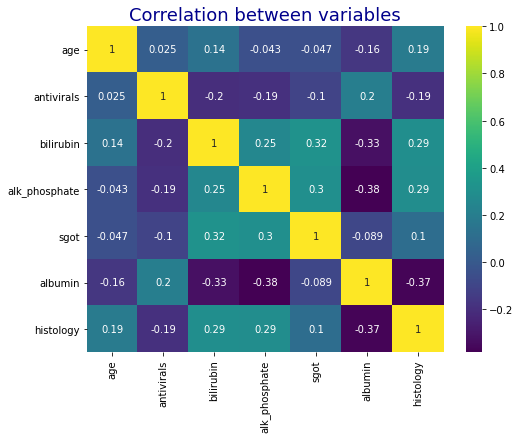

In [15]:
plt.figure(figsize=(8,6));
sns.heatmap(df_corr,annot=True,cmap = 'viridis');
plt.title('Correlation between variables',fontsize=18,color='darkblue');

# Maximum correlation = Between SGOT and Bilirubin 
This show that relationship between SGOT and Bilirubin is higher than other variables in this dataset

# Minimum Correlation = Between Alkaline Phosphate and Albumin
This shows that relationship between Alkaline Phosphate and Albumin is very lower than other variables in this dataset

# Converting Categorical variables to numeric

In [16]:
from sklearn.preprocessing import LabelEncoder
L_B = LabelEncoder()

In [17]:
data = df.copy()
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,False,live
10,39,female,False,True,False,False,False,False,True,False,False,False,False,1.3,78.0,30.0,4.4,False,live


In [18]:
data['sex'] = L_B.fit_transform(data['sex'])
data['steroid'] = L_B.fit_transform(data['steroid'])
data['antivirals'] = L_B.fit_transform(data['antivirals'])
data['fatigue'] = L_B.fit_transform(data['fatigue'])
data['malaise'] = L_B.fit_transform(data['malaise'])
data['anorexia'] = L_B.fit_transform(data['anorexia'])
data['liver_big'] = L_B.fit_transform(data['liver_big'])
data['liver_firm'] = L_B.fit_transform(data['liver_firm'])
data['spleen_palpable'] = L_B.fit_transform(data['spleen_palpable'])
data['spiders'] = L_B.fit_transform(data['spiders'])
data['ascites'] = L_B.fit_transform(data['ascites'])
data['varices'] = L_B.fit_transform(data['varices'])
data['histology'] = L_B.fit_transform(data['histology'])
data['class'] = L_B.fit_transform(data['class'])


In [19]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,0,1
5,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95.0,28.0,4.0,0,1
10,39,0,0,1,0,0,0,0,1,0,0,0,0,1.3,78.0,30.0,4.4,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              112 non-null    int64  
 1   sex              112 non-null    int32  
 2   steroid          112 non-null    int32  
 3   antivirals       112 non-null    int64  
 4   fatigue          112 non-null    int32  
 5   malaise          112 non-null    int32  
 6   anorexia         112 non-null    int32  
 7   liver_big        112 non-null    int32  
 8   liver_firm       112 non-null    int32  
 9   spleen_palpable  112 non-null    int32  
 10  spiders          112 non-null    int32  
 11  ascites          112 non-null    int32  
 12  varices          112 non-null    int32  
 13  bilirubin        112 non-null    float64
 14  alk_phosphate    112 non-null    float64
 15  sgot             112 non-null    float64
 16  albumin          112 non-null    float64
 17  histology       

Now all the variables are changed into numeric

# Exploratory Data Analysis

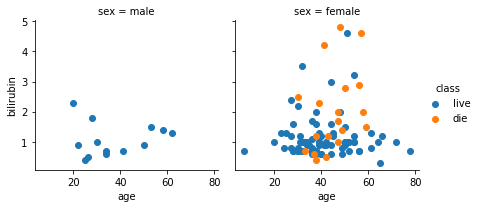

In [21]:
axes = sns.FacetGrid(df, col = 'sex',hue='class');
axes.map(plt.scatter,'age','bilirubin');
axes.add_legend();

# The above plot gives the relationship between Age and Bilirubin with respect to Gender and class variables,since there is no death is occured in male is confirmed.

Text(0, 0.5, 'albumin')

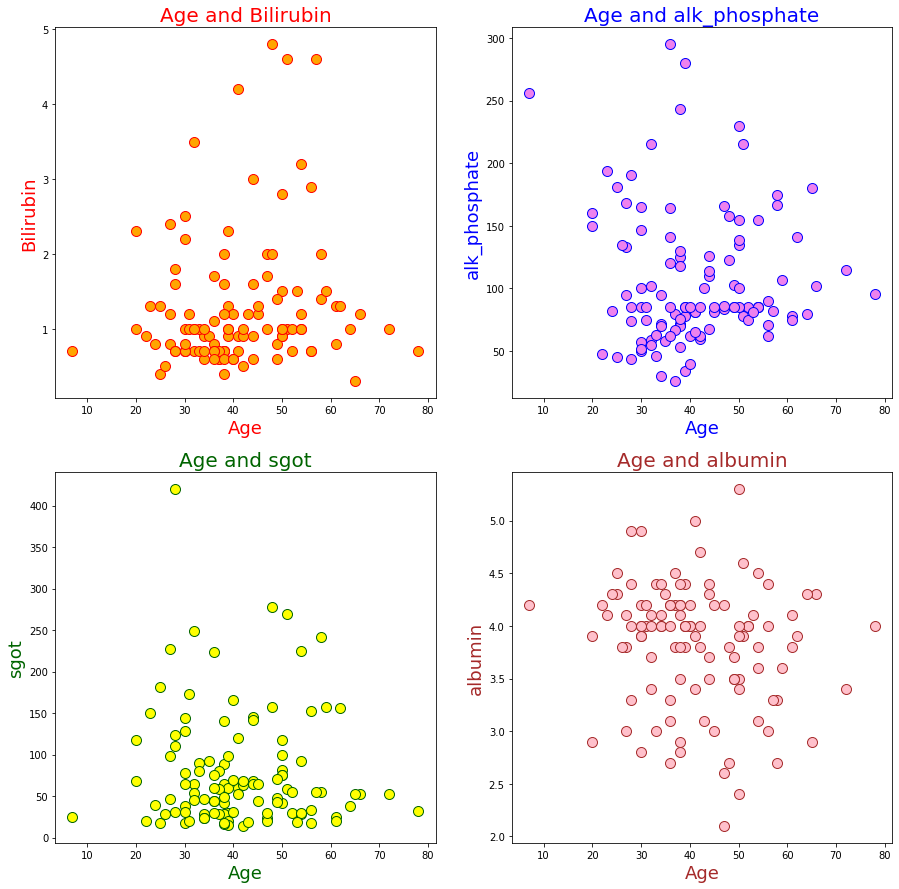

In [22]:
fig = plt.figure(figsize=(15,15))
plt.tight_layout()
axes1 = fig.add_subplot(2,2,1)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)
axes1.plot(df['age'],df['bilirubin'],'o',markersize=10,color = 'red',markerfacecolor='orange')
axes2.plot(df['age'],df['alk_phosphate'],'o',markersize=10,color = 'blue',markerfacecolor='violet')
axes3.plot(df['age'],df['sgot'],'o',markersize=10,color = 'darkgreen',markerfacecolor='yellow')
axes4.plot(df['age'],df['albumin'],'o',markersize=10,color = 'brown',markerfacecolor='pink')
axes1.set_title('Age and Bilirubin',fontsize=20,color='red')
axes2.set_title('Age and alk_phosphate',fontsize=20,color='blue')
axes3.set_title('Age and sgot',fontsize=20,color='darkgreen')
axes4.set_title('Age and albumin',fontsize=20,color='brown')
axes1.set_xlabel('Age',fontsize=18,color='red')
axes1.set_ylabel('Bilirubin',fontsize=18,color='red')
axes2.set_xlabel('Age',fontsize=18,color='blue')
axes2.set_ylabel('alk_phosphate',fontsize=18,color='blue')
axes3.set_xlabel('Age',fontsize=18,color='darkgreen')
axes3.set_ylabel('sgot',fontsize=18,color='darkgreen')
axes4.set_xlabel('Age',fontsize=18,color='brown')
axes4.set_ylabel('albumin',fontsize=18,color='brown')

# The above is the point graph or scatterplot which gives the relation between Age and every continous variables in this dataset such as Bilirubin,Alkaline_phosphate,sgot,Albumin.

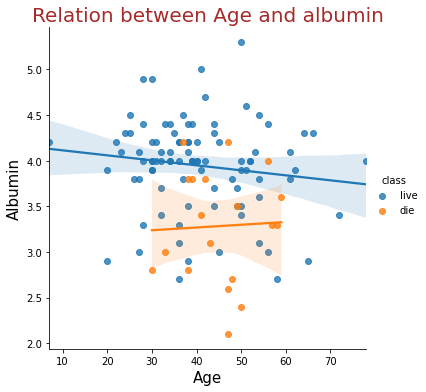

In [23]:
sns.lmplot(x='age',y='albumin',data=df,hue='class');
plt.title('Relation between Age and albumin',fontsize=20,color='brown');
plt.xlabel('Age',fontsize=15);
plt.ylabel('Albumin',fontsize=15);

# In this linear model plot,we analysed that when Age increases Albumin content makes the death rate higher and number of deaths is increased gradually.

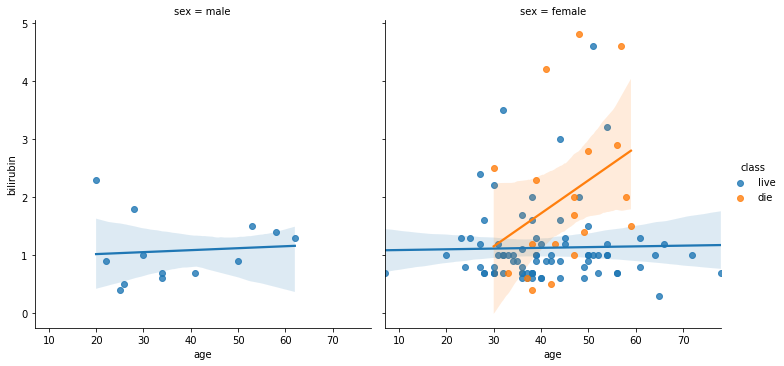

In [24]:
sns.lmplot(x='age',y='bilirubin',data=df,hue='class',col='sex',col_wrap=2);

# From this graph it is confirmed that there is no male died because of bilirubin and therefore many female died due to bilirubin.

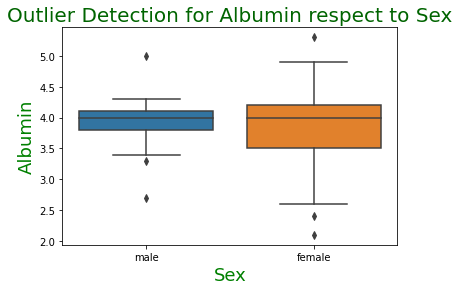

In [25]:
sns.boxplot(x='sex',y='albumin',data=df);
plt.title('Outlier Detection for Albumin respect to Sex',fontsize=20,color='darkgreen');
plt.xlabel('Sex',fontsize=18,color='green');
plt.ylabel('Albumin',fontsize=18,color='green');

# From this boxplot it is confirmed that both male and female contains outliers with respect to albumin

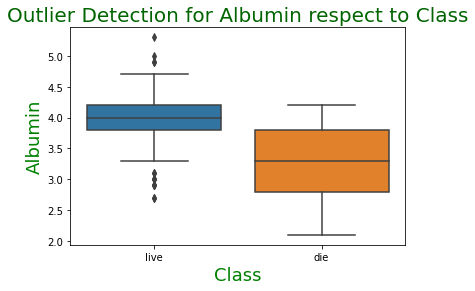

In [26]:
sns.boxplot(x='class',y='albumin',data=df);
plt.title('Outlier Detection for Albumin respect to Class',fontsize=20,color='darkgreen');
plt.xlabel('Class',fontsize=18,color='green');
plt.ylabel('Albumin',fontsize=18,color='green');

# From this boxplot it is confirmed that live class only contains outliers where as death class having no outliers with respect to Albumin

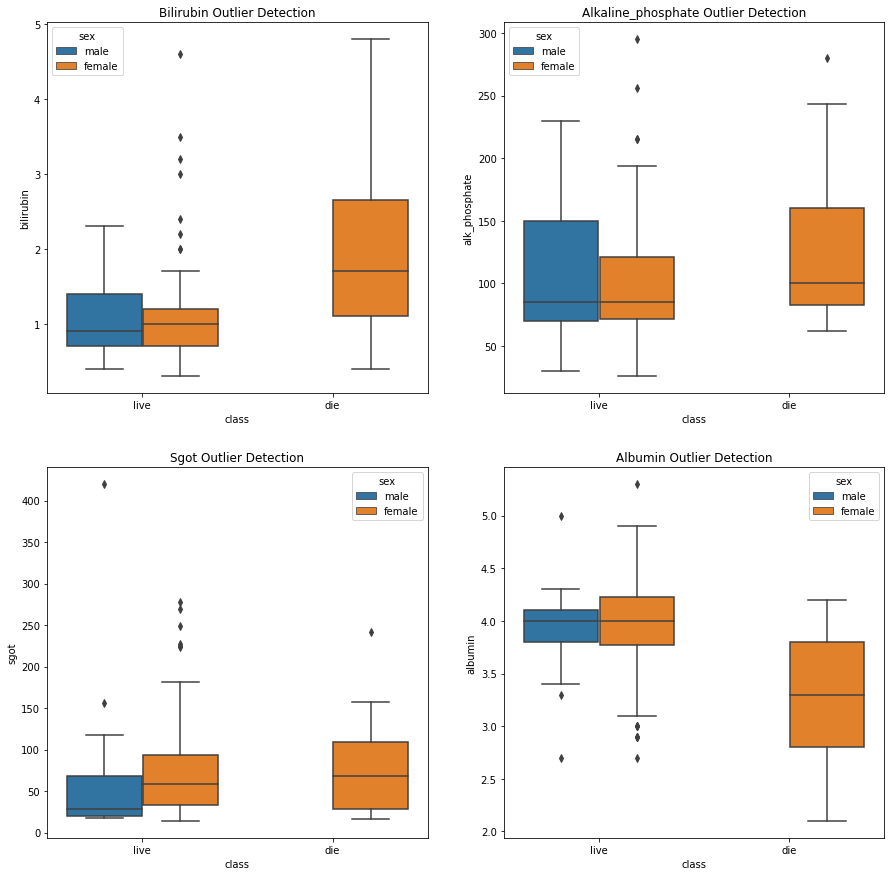

In [27]:
Fig,axes=plt.subplots(2,2,figsize=(15,15));
sns.boxplot(x='class',y='bilirubin',data=df,hue='sex',ax=axes[0][0]).set_title("Bilirubin Outlier Detection");
sns.boxplot(x='class',y='alk_phosphate',data=df,hue='sex',ax=axes[0][1]).set_title("Alkaline_phosphate Outlier Detection");
sns.boxplot(x='class',y='sgot',data=df,hue='sex',ax=axes[1][0]).set_title("Sgot Outlier Detection");
sns.boxplot(x='class',y='albumin',data=df,hue='sex',ax=axes[1][1]).set_title("Albumin Outlier Detection");

# The above plot gives the detection of outliers from this dataset with respect to Class and Gender

# Bilirubin with gender of female with class of live having many outliers in this dataset

mean : 41.19642857142857
median : 39.0


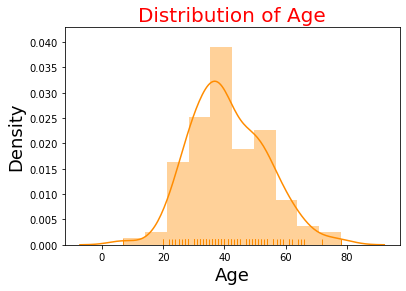

In [28]:
sns.distplot(df['age'],rug=True,color='darkorange')
plt.title('Distribution of Age',fontsize=20,color='Red')
plt.xlabel('Age',fontsize=18)
plt.ylabel('Density',fontsize=18)
print('mean :' , np.mean(df['age']))
print('median :' , np.median(df['age']))

# From this graph it is confirmed that it is Slightly Right Skewed,since mean is greater than median

In [29]:
df_live = df[df['class'] == 'live']
df_die = df[df['class'] == 'die']

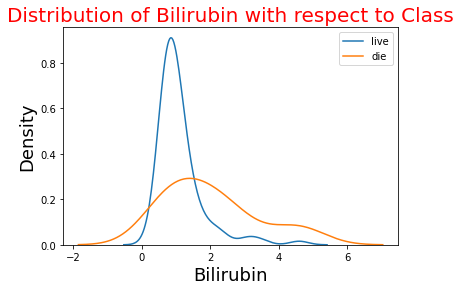

In [30]:
#Fig,axes=plt.subplots(2,2,figsize=(15,15));
sns.distplot(df_live['bilirubin'],hist=False,label='live');
sns.distplot(df_die['bilirubin'],hist=False,label='die');
plt.title('Distribution of Bilirubin with respect to Class',fontsize=20,color='Red');
plt.xlabel('Bilirubin',fontsize=18);
plt.ylabel('Density',fontsize=18);
plt.legend();

# From this graph it is concluded that distribution of Bilirubin is slightly Right Skewed with respect to both classes of live and death

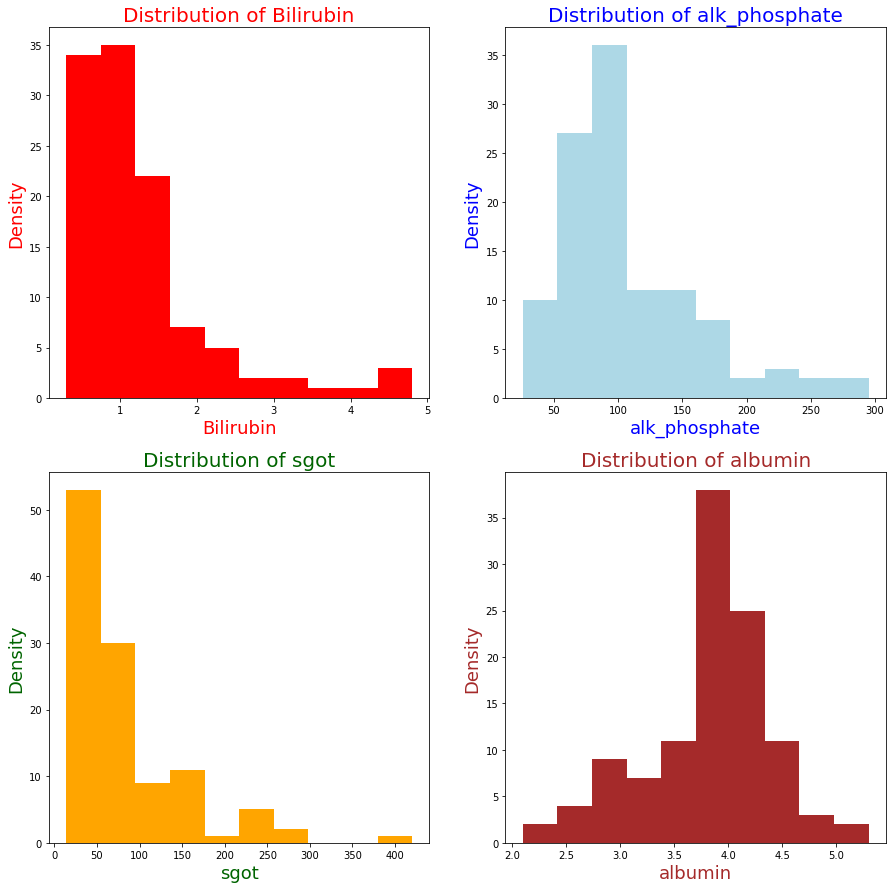

In [31]:
fig = plt.figure(figsize=(15,15));
plt.tight_layout();
axes1 = fig.add_subplot(2,2,1);
axes2 = fig.add_subplot(2,2,2);
axes3 = fig.add_subplot(2,2,3);
axes4 = fig.add_subplot(2,2,4);
axes1.hist(df['bilirubin'],color='red');
axes2.hist(df['alk_phosphate'],color='lightblue');
axes3.hist(df['sgot'],color='orange');
axes4.hist(df['albumin'],color='brown');
axes1.set_title('Distribution of Bilirubin',fontsize=20,color='red');
axes2.set_title('Distribution of alk_phosphate',fontsize=20,color='blue');
axes3.set_title('Distribution of sgot',fontsize=20,color='darkgreen');
axes4.set_title('Distribution of albumin',fontsize=20,color='brown');
axes1.set_xlabel('Bilirubin',fontsize=18,color='red');
axes1.set_ylabel('Density',fontsize=18,color='red');
axes2.set_xlabel('alk_phosphate',fontsize=18,color='blue');
axes2.set_ylabel('Density',fontsize=18,color='blue');
axes3.set_xlabel('sgot',fontsize=18,color='darkgreen');
axes3.set_ylabel('Density',fontsize=18,color='darkgreen');
axes4.set_xlabel('albumin',fontsize=18,color='brown');
axes4.set_ylabel('Density',fontsize=18,color='brown');



# From these graphs it is observed that the variables Bilirubin,Alkalin_phosphate & sgot are Right Skewed and where as Albumin is Left Skewed from this dataset

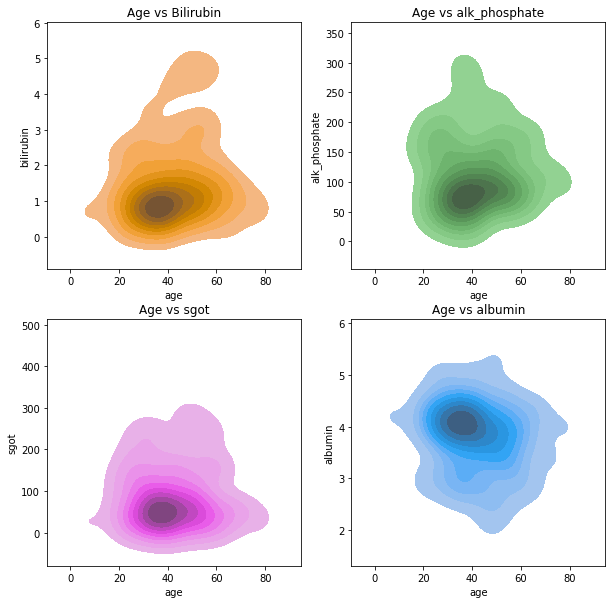

In [32]:
Fig,axes=plt.subplots(2,2,figsize=(10,10));
sns.kdeplot(data=df['age'],data2=df['bilirubin'],shade=True,color='orange',ax=axes[0][0]).set_title('Age vs Bilirubin');
sns.kdeplot(data=df['age'],data2=df['alk_phosphate'],shade=True,color='lightgreen',ax=axes[0][1]).set_title('Age vs alk_phosphate');
sns.kdeplot(data=df['age'],data2=df['sgot'],shade=True,color='violet',ax=axes[1][0]).set_title('Age vs sgot');
sns.kdeplot(data=df['age'],data2=df['albumin'],shade=True,ax=axes[1][1]).set_title('Age vs albumin');

# From this KDE plot,the darker shades gives the stronger relationship between those variables

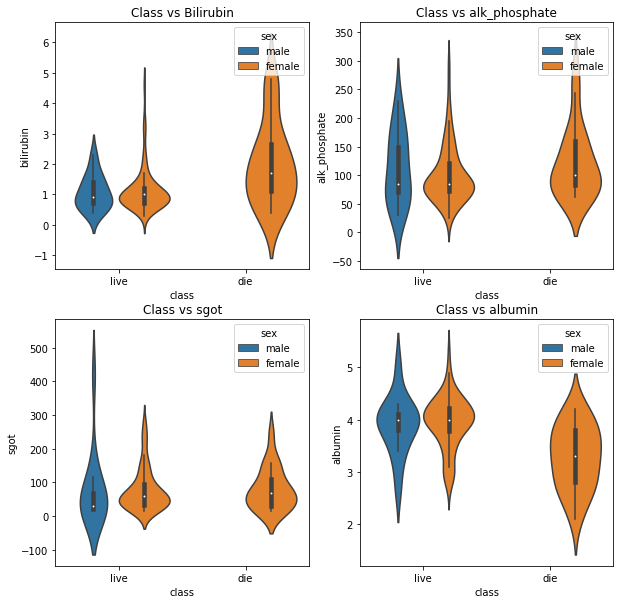

In [33]:
Fig,axes=plt.subplots(2,2,figsize=(10,10));
sns.violinplot(x='class',y='bilirubin',data=df,hue='sex',ax=axes[0][0]).set_title('Class vs Bilirubin');
sns.violinplot(x='class',y='alk_phosphate',data=df,hue='sex',ax=axes[0][1]).set_title('Class vs alk_phosphate');
sns.violinplot(x='class',y='sgot',data=df,hue='sex',ax=axes[1][0]).set_title('Class vs sgot');
sns.violinplot(x='class',y='albumin',data=df,hue='sex',ax=axes[1][1]).set_title('Class vs albumin');

# From this violin plot it is confirmed that there is no death occured in male with respect to these variables such as  Bilirubin ,    Alkaline_phosphate , Sgot and Albumin.

In [34]:
count_sex = df.groupby('sex')['sex'].count()
count_sex

sex
female    99
male      13
Name: sex, dtype: int64

In [35]:
count_class = df.groupby('class')['class'].count()
count_class

class
die     19
live    93
Name: class, dtype: int64

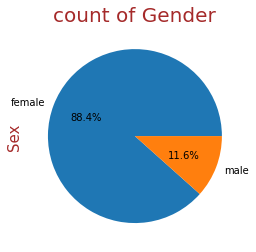

In [36]:
count_sex.plot.pie(autopct="%.1f%%");
plt.title('count of Gender',fontsize=20,color='brown');
plt.ylabel('Sex',fontsize=15,color='brown');

# Number of male is lesser than female in this dataset

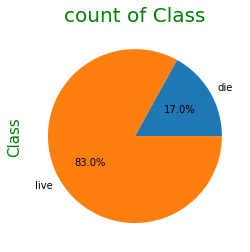

In [37]:
count_class.plot.pie(autopct="%.1f%%");
plt.title('count of Class',fontsize=20,color='Green');
plt.ylabel('Class',fontsize=15,color='Green');

# Number of people living is 7 times higher than number of people died due to hepatitis.

In [38]:
df_youth = df[(df['age'] > 1) & (df['age'] <=30) ]
df_medium_aged = df[(df['age'] > 30 ) & (df['age'] <= 55) ]
df_over_aged = df[df['age'] > 55]


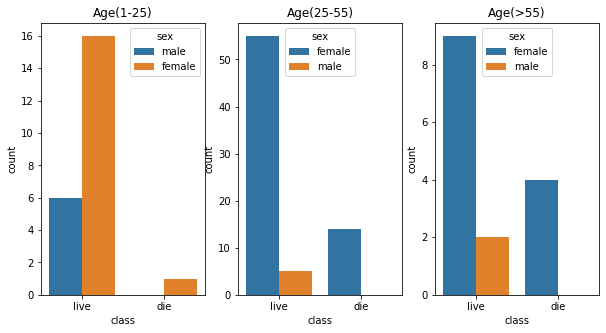

In [39]:
Fig,ax=plt.subplots(1,3,figsize=(10,5));
sns.countplot(df_youth['class'],hue=df_youth['sex'],ax = ax[0]).set_title("Age(1-25)");

sns.countplot(df_medium_aged['class'],hue=df_medium_aged['sex'],ax = ax[1]).set_title("Age(25-55)");

sns.countplot(df_over_aged['class'],hue=df_over_aged['sex'],ax = ax[2]).set_title("Age(>55)");



# The above plot gives the information about counts of gender with respect to Age limit with Death and live.

# Maximum aged female died due to hepatitis
# Death rate of male is very much lesser tham female

# CONCLUSION

From this analysis it is concluded that females are very much affected than male by Hepatitis

Females are having 7 times higher death percentage than male.

Mostly aged females are died due to hepatitis.